In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
import category_encoders as ce 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,GammaRegressor,PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR


In [180]:
df = pd.read_csv("Data/train.csv")

In [181]:
df.shape

(19109, 36)

In [182]:
df.isnull().sum()

brand                             2
model                             2
year                              2
mileage                           2
engine                           47
engine_size                    1249
transmission                    105
automatic_transmission            2
fuel_type                         2
drivetrain                        2
min_mpg                        3006
max_mpg                        3006
damaged                         169
first_owner                     306
personal_using                  189
turbo                             2
alloy_wheels                      2
adaptive_cruise_control           2
navigation_system                 2
power_liftgate                    2
backup_camera                     2
keyless_start                     2
remote_start                      2
sunroof/moonroof                  2
automatic_emergency_braking       2
stability_control                 2
leather_seats                     2
memory_seat                 

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19109 entries, 0 to 19108
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        19107 non-null  object 
 1   model                        19107 non-null  object 
 2   year                         19107 non-null  float64
 3   mileage                      19107 non-null  float64
 4   engine                       19062 non-null  object 
 5   engine_size                  17860 non-null  float64
 6   transmission                 19004 non-null  object 
 7   automatic_transmission       19107 non-null  float64
 8   fuel_type                    19107 non-null  object 
 9   drivetrain                   19107 non-null  object 
 10  min_mpg                      16103 non-null  float64
 11  max_mpg                      16103 non-null  float64
 12  damaged                      18940 non-null  float64
 13  first_owner     

In [185]:
df.columns=df.columns.str.replace("/","")

Index(['brand', 'model', 'year', 'mileage', 'engine', 'engine_size',
       'transmission', 'automatic_transmission', 'fuel_type', 'drivetrain',
       'min_mpg', 'max_mpg', 'damaged', 'first_owner', 'personal_using',
       'turbo', 'alloy_wheels', 'adaptive_cruise_control', 'navigation_system',
       'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start',
       'sunroofmoonroof', 'automatic_emergency_braking', 'stability_control',
       'leather_seats', 'memory_seat', 'third_row_seating',
       'apple_car_playandroid_auto', 'bluetooth', 'usb_port', 'heated_seats',
       'interior_color', 'exterior_color', 'price'],
      dtype='object')

In [139]:
df=df.drop(df[df["price"]=="ot Priced"].index)
df.price=df.price.fillna("o")
df=df.drop(df[df['price']=="o"].index)
df.reset_index(drop=True)

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,Mazda,CX-9 Touring,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,Black,Snowflake White Pearl,36789
1,Alfa,Romeo Stelvio 4DR SUV AWD,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Black,Rosso Competizione Tri-Coat,39993
2,Chevrolet,Silverado 1500 Limited LT,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jet Black,Silver Ice Metallic,46986
3,Land,Rover Range Rover P400 SE,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Ebony,Fuji White,141999
4,Mitsubishi,Outlander Sport 2.0 SE,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Black,White,21595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19070,Lexus,RC 350 Base,2017.0,77886.0,3.5L V6 24V PDI DOHC,3.5,8-Speed Automatic,1.0,Gasoline,Rear-wheel Drive,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,Black,Obsidian Black,30023
19071,Chevrolet,Camaro 2SS,2020.0,30921.0,6.2L V8 16V GDI OHV,6.2,10-Speed Automatic,1.0,Gasoline,Rear-wheel Drive,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,Jet Black,Black,42500
19072,Hyundai,Palisade Calligraphy,2021.0,25490.0,3.8L V6 24V GDI DOHC,3.8,8-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,Black,Becketts Black,43999
19073,Honda,Accord Sport,2019.0,30840.0,1.5L I4 16V GDI DOHC Turbo,1.5,Automatic CVT,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,Gray,White,26998


In [140]:
df['price']=df['price'].astype('Int32')

In [141]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

max_mpg                        15.743119
min_mpg                        15.743119
engine_size                     6.537353
interior_color                  6.007864
first_owner                     1.588467
exterior_color                  1.069463
personal_using                  0.975098
damaged                         0.870249
transmission                    0.513761
engine                          0.235911
third_row_seating               0.000000
automatic_emergency_braking     0.000000
stability_control               0.000000
leather_seats                   0.000000
memory_seat                     0.000000
brand                           0.000000
apple_car_play/android_auto     0.000000
remote_start                    0.000000
bluetooth                       0.000000
usb_port                        0.000000
heated_seats                    0.000000
sunroof/moonroof                0.000000
navigation_system               0.000000
keyless_start                   0.000000
backup_camera   

In [142]:
# missing value analysis and imputations
data=[]
for i in df.columns.to_list():
    if df[i].dtype=="O":
        data.append([i,df[i].unique(),df[i].nunique()])
uniques=pd.DataFrame(data=data,columns=["colname","unique","nunique"])

In [143]:
uniques

,colname,unique,nunique
0,brand,"[Mazda, Alfa, Chevrolet, Land, Mitsubishi, FIA...",25
1,model,"[CX-9 Touring, Romeo Stelvio 4DR SUV AWD, Silv...",3494
2,engine,"[2.5L I4 16V GDI DOHC Turbo, Twin Turbo Premiu...",1162
3,transmission,"[6-Speed Automatic, Automatic, Automatic CVT, ...",189
4,fuel_type,"[Gasoline, Hybrid, E85 Flex Fuel, Electric, Di...",10
5,drivetrain,"[Four-wheel Drive, Front-wheel Drive, Rear-whe...",5
6,interior_color,"[Black, Jet Black, Ebony, Gray, Saddle, Carbon...",957
7,exterior_color,"[Snowflake White Pearl, Rosso Competizione Tri...",1941


In [144]:
df.duplicated().sum()

0

In [145]:
obj=df.select_dtypes(include="object").columns.to_list()
flo=df.select_dtypes(include="float").columns.to_list()
inte=df.select_dtypes(include="int").columns.to_list()

In [146]:
si_obj=SimpleImputer(strategy="most_frequent")
df[obj]=si_obj.fit_transform(df[obj])
si_float=SimpleImputer(strategy="median")
df[flo]=si_float.fit_transform(df[flo])

In [147]:
df.isnull().sum()

brand                          0
model                          0
year                           0
mileage                        0
engine                         0
engine_size                    0
transmission                   0
automatic_transmission         0
fuel_type                      0
drivetrain                     0
min_mpg                        0
max_mpg                        0
damaged                        0
first_owner                    0
personal_using                 0
turbo                          0
alloy_wheels                   0
adaptive_cruise_control        0
navigation_system              0
power_liftgate                 0
backup_camera                  0
keyless_start                  0
remote_start                   0
sunroof/moonroof               0
automatic_emergency_braking    0
stability_control              0
leather_seats                  0
memory_seat                    0
third_row_seating              0
apple_car_play/android_auto    0
bluetooth 

In [148]:
flo=[i for i in flo if df[i].nunique() > 2]

In [149]:
flo

['year', 'mileage', 'engine_size', 'min_mpg', 'max_mpg']

<Axes: >

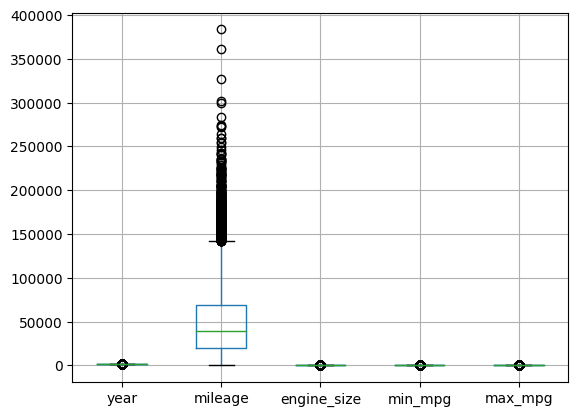

In [150]:
df[flo].boxplot()

<Axes: >

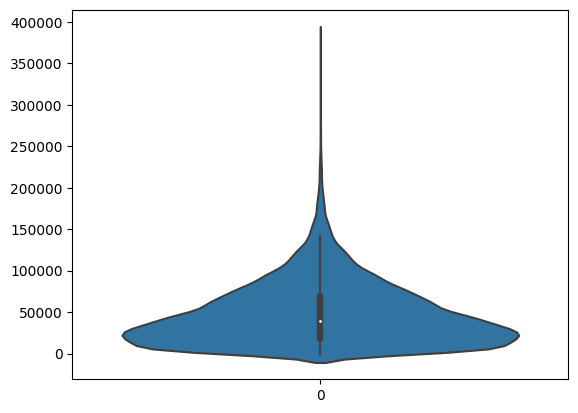

In [151]:
sns.violinplot(df['mileage'])

In [152]:
def iqr(col):
    qt_25=df[col].quantile(0.25)
    qt_75=df[col].quantile(0.75)
    iqr=qt_75-qt_25
    low=qt_25-1.5*iqr
    upp=qt_75+1.5*iqr
    return (low,upp)

In [153]:
low,upp=iqr('mileage')

In [154]:
df.drop(df[df['mileage']>=upp].index,inplace=True)
df.drop(df[df['mileage']<=low].index,inplace=True)
df=df.reset_index(drop=True)

<Axes: >

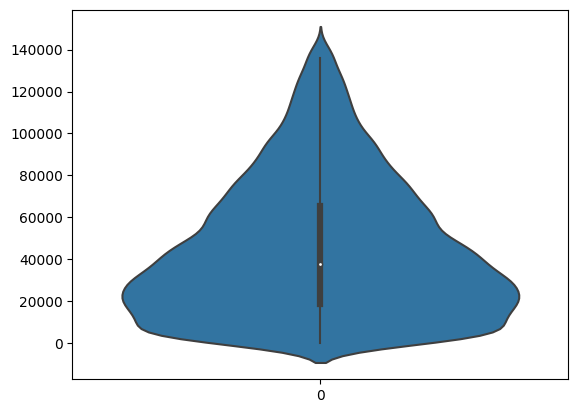

In [155]:
sns.violinplot(df['mileage'])

In [156]:
low,upp=iqr('price')

<Axes: >

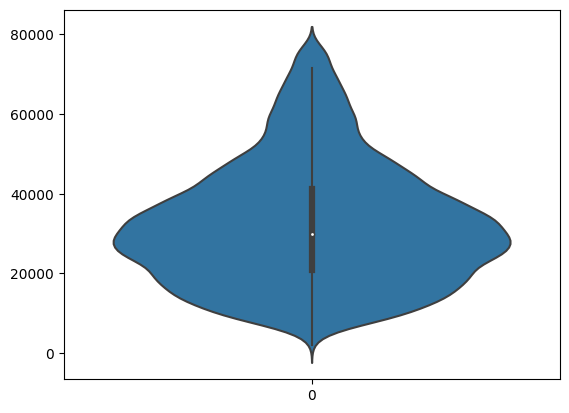

In [157]:
df.drop(df[df['price']>=upp].index,inplace=True)
df.drop(df[df['price']<=low].index,inplace=True)
df=df.reset_index(drop=True)
sns.violinplot(df['price'])

<Axes: >

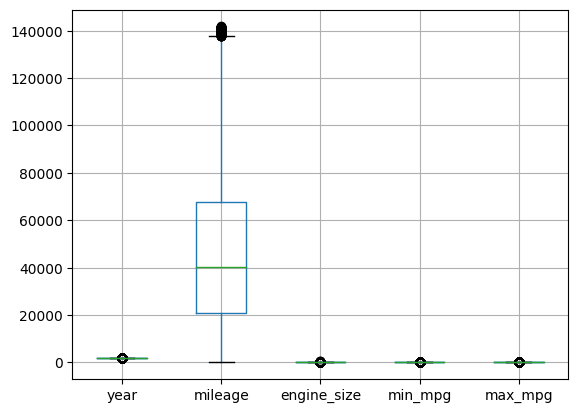

In [158]:
df[flo].boxplot()

<Axes: >

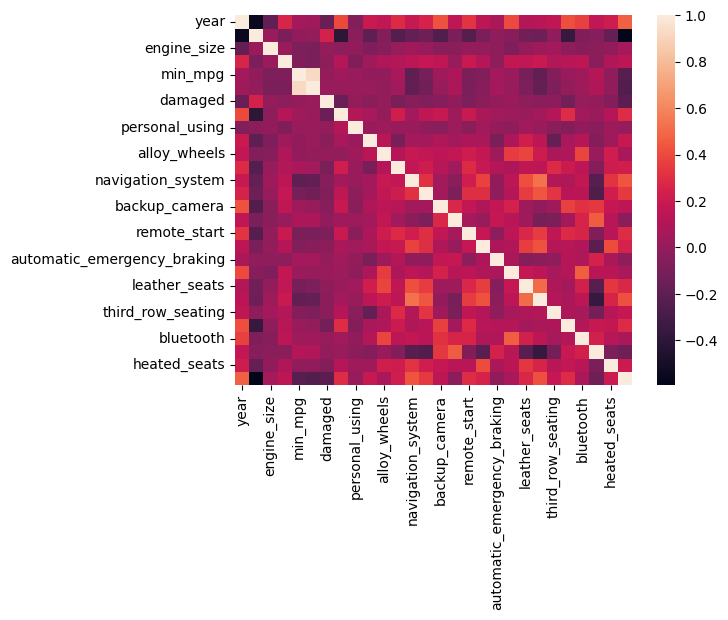

In [159]:
sns.heatmap(df.corr())

In [160]:
obj=df.select_dtypes(include="object").columns.to_list()

In [161]:
tar=[]
ohe=[]
for i in obj:
    if(df[i].nunique()>10):
        tar.append(i)
    else:
        ohe.append(i)

In [162]:
tar

['brand',
 'model',
 'engine',
 'transmission',
 'interior_color',
 'exterior_color']

In [163]:
ohe

['fuel_type', 'drivetrain']

In [164]:
x=df.drop("price",axis=1)
y=df["price"]

In [32]:
target=ce.TargetEncoder(cols=tar)
x=target.fit_transform(x,y)
one=ce.OneHotEncoder(cols=ohe)
x=one.fit_transform(x)

In [33]:
x

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type_1,fuel_type_2,...,stability_control,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color
0,25137.883963,28133.099785,2022.0,6580.0,33066.305669,2.5,24363.567797,1.0,1,0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,31492.320856,27751.86015
1,33636.071708,34102.394186,2018.0,62717.0,34673.508538,2.9,36754.097304,1.0,1,0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,31492.320856,33612.72431
2,35540.695586,34219.435609,2022.0,15463.0,48537.92196,5.3,36754.097304,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40580.733096,29806.879066
3,20693.571238,22905.423758,2021.0,36727.0,18395.5,2.0,23900.005795,1.0,1,0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,31492.320856,31859.56391
4,15202.220681,10015.448072,2012.0,83908.0,10760.963856,1.4,37118.963616,0.0,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31492.320856,27073.998479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17531,38671.078348,32171.224254,2017.0,77886.0,38705.68652,3.5,37118.963616,1.0,1,0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,31492.320856,34158.288797
17532,35540.695586,32647.333518,2020.0,30921.0,47524.434264,6.2,49095.996516,1.0,1,0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,40580.733096,32824.625437
17533,25296.719557,42162.253429,2021.0,25490.0,38509.452905,3.8,37118.963616,1.0,1,0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,31492.320856,33244.085104
17534,26967.444593,30035.914111,2019.0,30840.0,25737.142293,1.5,23900.005795,1.0,1,0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,23671.528129,31859.56391


In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=50)

In [35]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [36]:
from sklearn.feature_selection import SelectKBest,f_regression

In [37]:
kb=SelectKBest(f_regression,k=39)
x_train=kb.fit_transform(x_train,y_train)
x_test=kb.transform(x_test)

In [38]:
fet_imp=pd.Series(kb.scores_,x.columns)
fet_imp.sort_values(ascending=False)

model                          13759.025201
engine                         10943.870854
mileage                         6742.755400
brand                           4384.369426
exterior_color                  3990.096628
transmission                    3606.746519
year                            3388.630192
drivetrain_2                    3135.314961
navigation_system               2696.590862
memory_seat                     2545.574142
interior_color                  2262.741762
drivetrain_1                    1816.688169
power_liftgate                  1557.810468
remote_start                    1159.020535
first_owner                     1142.152612
apple_car_play/android_auto     1098.852998
leather_seats                   1028.351245
sunroof/moonroof                 818.844600
max_mpg                          790.848623
adaptive_cruise_control          663.514588
min_mpg                          639.348994
heated_seats                     528.139874
damaged                         

In [39]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [40]:
# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
rf       = RandomForestRegressor()
gamm     = GammaRegressor()
act      = PassiveAggressiveRegressor()

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR,rf,gamm,act]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 5102.452
Mean Squared Error (MSE): 47035647.255
Root Mean Squared Error (RMSE): 6858.254
R2_score: 0.799398
Root Mean Squared Log Error (RMSLE): 8.833
Mean Absolute Percentage Error (MAPE): 20.09 %
Adj R Square:  0.798859
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 4305.173
Mean Squared Error (MSE): 40103073.506
Root Mean Squared Error (RMSE): 6332.699
R2_score: 0.828964
Root Mean Squared Log Error (RMSLE): 8.753
Mean Absolute Percentage Error (MAPE): 15.11 %
Adj R Square:  0.828504
------------------------------------------------------------------------------------------------------------


C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_19668\2425221519.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_19668\2425221519.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 3052.369
Mean Squared Error (MSE): 19381847.064
Root Mean Squared Error (RMSE): 4402.482
R2_score: 0.917338
Root Mean Squared Log Error (RMSLE): 8.39
Mean Absolute Percentage Error (MAPE): 10.81 %
Adj R Square:  0.917116
------------------------------------------------------------------------------------------------------------
Model Name:  KNeighborsRegressor()
Mean Absolute Error (MAE): 4886.141
Mean Squared Error (MSE): 48774509.901
Root Mean Squared Error (RMSE): 6983.875
R2_score: 0.791982
Root Mean Squared Log Error (RMSLE): 8.851
Mean Absolute Percentage Error (MAPE): 17.44 %
Adj R Square:  0.791423
------------------------------------------------------------------------------------------------------------


C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_19668\2425221519.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_19668\2425221519.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error (MAE): 2882.193
Mean Squared Error (MSE): 17116569.247
Root Mean Squared Error (RMSE): 4137.218
R2_score: 0.927
Root Mean Squared Log Error (RMSLE): 8.328
Mean Absolute Percentage Error (MAPE): 10.54 %
Adj R Square:  0.926804
------------------------------------------------------------------------------------------------------------


C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_19668\2425221519.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  GradientBoostingRegressor()
Mean Absolute Error (MAE): 3467.206
Mean Squared Error (MSE): 23531549.299
Root Mean Squared Error (RMSE): 4850.933
R2_score: 0.89964
Root Mean Squared Log Error (RMSLE): 8.487
Mean Absolute Percentage Error (MAPE): 12.41 %
Adj R Square:  0.89937
------------------------------------------------------------------------------------------------------------


C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_19668\2425221519.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Mean Absolute Error (MAE): 2924.782
Mean Squared Error (MSE): 17008594.659
Root Mean Squared Error (RMSE): 4124.148
R2_score: 0.92746
Root Mean Squared Log Error (RMSLE): 8.325
Mean Absolute Percentage Error (MAPE): 10.32 %
Adj R Square:  0.92726

C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_19668\2425221519.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 3058.727
Mean Squared Error (MSE): 19523006.152
Root Mean Squared Error (RMSE): 4418.485
R2_score: 0.916736
Root Mean Squared Log Error (RMSLE): 8.394
Mean Absolute Percentage Error (MAPE): 10.86 %
Adj R Square:  0.916512
------------------------------------------------------------------------------------------------------------
Model Name:  GammaRegressor()
Mean Absolute Error (MAE): 5174.559
Mean Squared Error (MSE): 53930764.414
Root Mean Squared Error (RMSE): 7343.757
R2_score: 0.769991
Root Mean Squared Log Error (RMSLE): 8.902
Mean Absolute Percentage Error (MAPE): 19.41 %
Adj R Square:  0.769373
------------------------------------------------------------------------------------------------------------
Model Name:  PassiveAggressiveRegressor()
Mean Absolute Error (MAE): 4964.312
Mean Squared Error (MSE): 50934738.447
Root Mean Squared Error (RMSE): 7136.858
R2_score: 0.782768
Root Mean Squared Log Error (RMSLE): 8.8

C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_19668\2425221519.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_19668\2425221519.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\Gopal Kholade\AppData\Local\Temp\ipykernel_19668\2425221519.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)


In [41]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),5102.452414,0.798859,6858.253951,20.086723,4.703565e+07,8.833208,0.799398
1,DecisionTreeRegressor(),4305.173161,0.828504,6332.698754,15.108997,4.010307e+07,8.753482,0.828964
2,"(DecisionTreeRegressor(max_features=1.0, rando...",3052.368863,0.917116,4402.481921,10.812620,1.938185e+07,8.389924,0.917338
3,KNeighborsRegressor(),4886.141190,0.791423,6983.874992,17.442416,4.877451e+07,8.851359,0.791982
4,"(ExtraTreeRegressor(random_state=1601163144), ...",2882.193167,0.926804,4137.217573,10.544505,1.711657e+07,8.327779,0.927000
5,([DecisionTreeRegressor(criterion='friedman_ms...,3467.206094,0.899370,4850.932828,12.406038,2.353155e+07,8.486926,0.899640
6,"XGBRegressor(base_score=None, booster=None, ca...",2924.781606,0.927265,4124.147749,10.316251,1.700859e+07,8.324615,0.927460
7,"(DecisionTreeRegressor(max_features=1.0, rando...",3058.726791,0.916512,4418.484599,10.859467,1.952301e+07,8.393552,0.916736
8,GammaRegressor(),5174.558731,0.769373,7343.756832,19.411153,5.393076e+07,8.901606,0.769991
9,PassiveAggressiveRegressor(),4964.311944,0.782184,7136.857743,18.433707,5.093474e+07,8.873028,0.782768


In [42]:
from sklearn.model_selection import RandomizedSearchCV
param={'n_estimators': [1000,2000,3000],
       'bootstrap': [True,False],
       'ccp_alpha': [0.1,0.3,0.6],
       'criterion': ["squared_error", "absolute_error", "friedman_mse", "poisson"]}

In [43]:
randm=RandomizedSearchCV(ExtraTreesRegressor(),param_distributions=param,n_iter=10,n_jobs=4,cv=3,verbose=3)
randm.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [52]:
ext=ExtraTreesRegressor(n_estimators=1000,ccp_alpha=0.1,criterion="friedman_mse")
ext.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.1, criterion='friedman_mse',
                    n_estimators=1000)

In [53]:
y_pred=ext.predict(x_test)
r2_score(y_test,y_pred)

0.9233714648651771